# Chapter 10: Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set_style('white')
from sklearn.preprocessing import scale

## Lab 1: Principal Components Analysis

In [2]:
us_df = pd.read_csv('data/USArrests.csv', index_col=0)
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [3]:
us_df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [4]:
us_df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [5]:
from sklearn.decomposition import PCA

In [6]:
X = pd.DataFrame(scale(us_df), index=us_df.index, columns=us_df.columns)

In [7]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [9]:
pca.transform(X).shape

(50, 4)

In [10]:
us_df_transformed = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
us_df_transformed.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


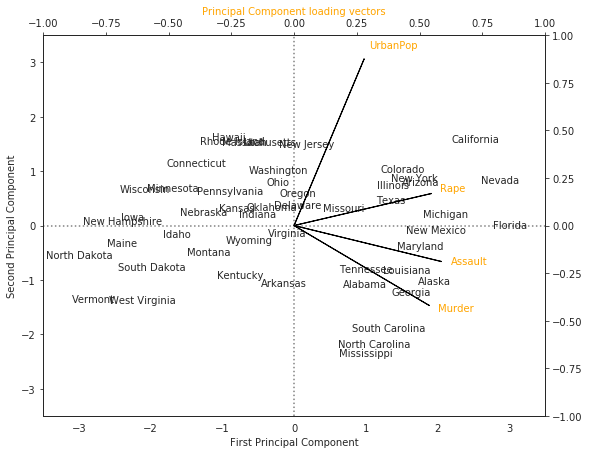

In [11]:
fig, ax1 = plt.subplots(figsize=(9, 7))

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

# Plot the first 2 principal components
for i in us_df_transformed.index:
  ax1.annotate(i, (us_df_transformed.PC1.loc[i], -us_df_transformed.PC2.loc[i]), ha='center')
  
# Plot reference lines
ax1.hlines(0, -3.5, 3.5, linestyles='dotted', color='grey')
ax1.vlines(0, -3.5, 3.5, linestyles='dotted', color='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using second y-axis
ax2 = ax1.twinx().twiny()

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.tick_params(axis='y', color='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text
a = 1.07
for i in pca_loadings.index:
  ax2.annotate(i, (pca_loadings.PC1.loc[i] * a, -pca_loadings.PC2.loc[i] * a), color='orange')
  
# Plot vectors
ax2.arrow(0, 0, pca_loadings.PC1[0], -pca_loadings.PC2[0], color='k')
ax2.arrow(0, 0, pca_loadings.PC1[1], -pca_loadings.PC2[1], color='k')
ax2.arrow(0, 0, pca_loadings.PC1[2], -pca_loadings.PC2[2], color='k')
ax2.arrow(0, 0, pca_loadings.PC1[3], -pca_loadings.PC2[3], color='k');

In [12]:
# Standard deviation of each principal component
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

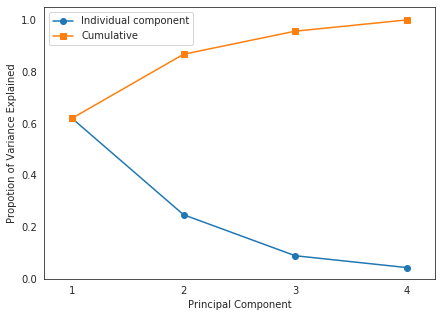

In [13]:
plt.figure(figsize=(7, 5))

plt.plot(np.arange(1, 5), pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.arange(1, 5), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Propotion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks(np.arange(1, 5))
plt.legend(loc=2);

## Lab 2: Clustering
### K-Means Clustering

In [14]:
np.random.seed(2)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

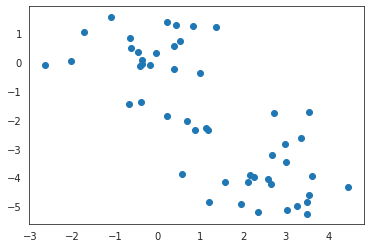

In [17]:
plt.scatter(X[:, 0], X[:, 1]);

In [18]:
np.random.seed(4)
kmeans_2 = KMeans(n_clusters=3, n_init=20)
kmeans_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
pd.Series(kmeans_2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [20]:
kmeans_2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [21]:
print('Sum of squared distances of samples to their closest cluster center: {}'.format(kmeans_2.inertia_))

Sum of squared distances of samples to their closest cluster center: 68.97379200939726


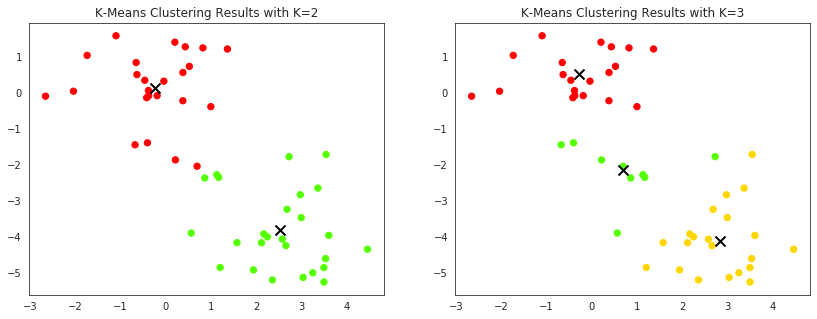

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.labels_, cmap=plt.cm.prism)
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='k', linewidth=2)

ax2.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_2.labels_, cmap=plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', s=100, c='k', linewidth=2);

### Hierarchycal Clustering

In [23]:
import scipy.cluster.hierarchy as sch

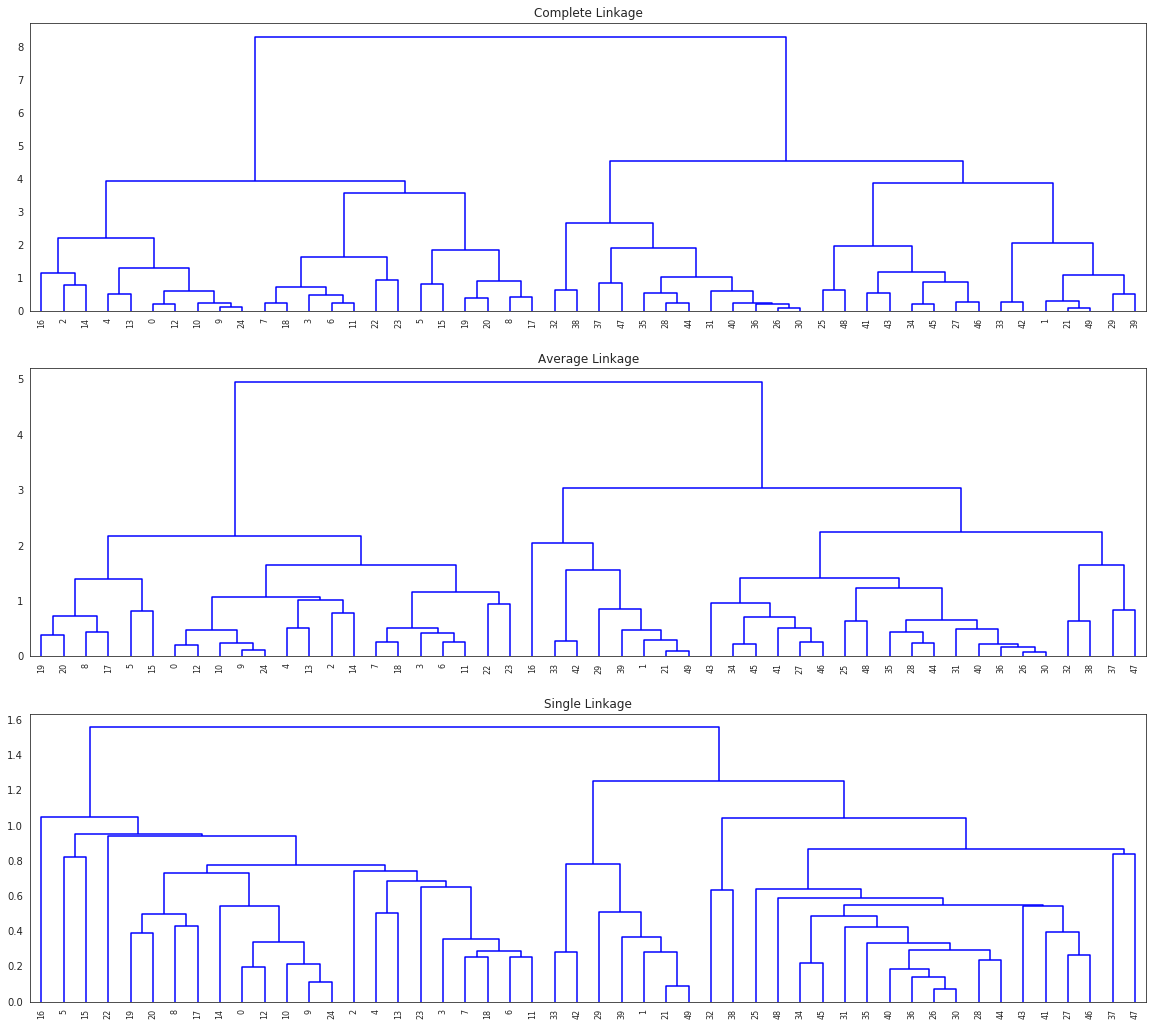

In [24]:
# Plotting the dendrogram
fig, axes = plt.subplots(3, 1, figsize=(20, 18))
for method, ax in zip(['complete', 'average', 'single'], axes):
  dendrogram = sch.dendrogram(sch.linkage(X, method=method), ax=ax, color_threshold=0)
  ax.set_title(method.title() + ' Linkage')

In [25]:
# Fitting the hierarchical clustering into the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(X)
y_hc

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

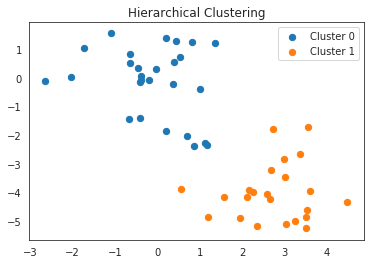

In [26]:
for y in np.unique(y_hc):
  plt.scatter(X[y_hc==y, 0], X[y_hc==y, 1], s=40, cmap=plt.cm.prism, label='Cluster {}'.format(y))
plt.legend()
plt.title('Hierarchical Clustering');

## Lab 3: NCI60 Data Example

In [27]:
nci_df = pd.read_csv('data/NCI60_X.csv', index_col=0)

In [28]:
nci_df.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [29]:
nci_label = pd.read_csv('data/NCI60_y.csv', index_col=0)
nci_label.columns = ['type']
nci_label.head()

,type
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [30]:
nci_label.type.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
MCF7D-repro    1
K562B-repro    1
UNKNOWN        1
K562A-repro    1
MCF7A-repro    1
Name: type, dtype: int64

### PCA on the NCI60 Data

In [31]:
X = scale(nci_df)

In [32]:
pca_2 = PCA()
nci_transformed = pd.DataFrame(pca_2.fit_transform(X))

In [33]:
nci_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14


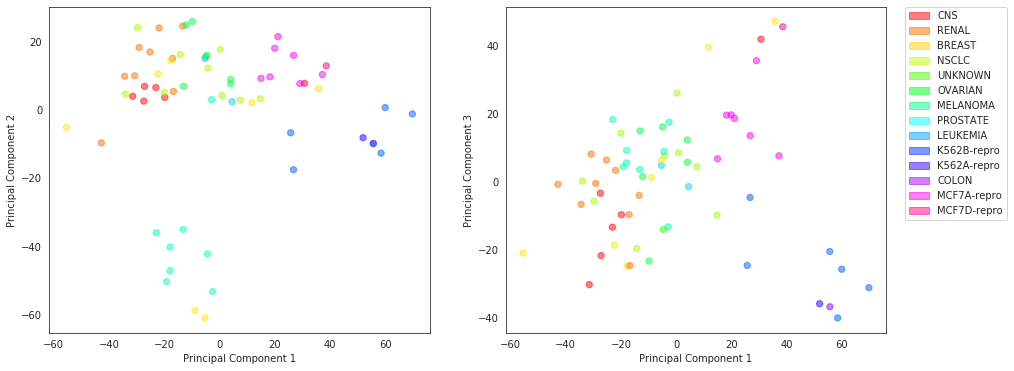

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

color_idx = pd.factorize(nci_label.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(nci_transformed.iloc[:, 0], -nci_transformed.iloc[:, 1], c=color_idx, cmap=cmap, alpha=0.5, s=40)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(nci_transformed.iloc[:, 0], nci_transformed.iloc[:, 2], c=color_idx, cmap=cmap, alpha=0.5, s=40)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes since we do not create scatter plots per class
handles = []
labels = pd.factorize(nci_label.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
  
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [35]:
pd.DataFrame([nci_transformed.iloc[:, :5].std(axis=0).values,
              pca_2.explained_variance_ratio_[:5],
              np.cumsum(pca_2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,28.073658,21.651171,19.977151,17.167203,16.098068
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


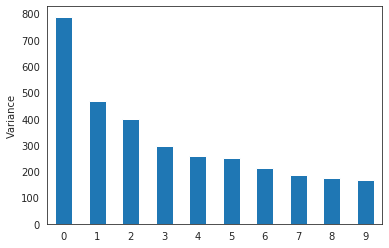

In [36]:
nci_transformed.iloc[:, :10].var(axis=0).plot(kind='bar', rot=0)
plt.ylabel('Variance');

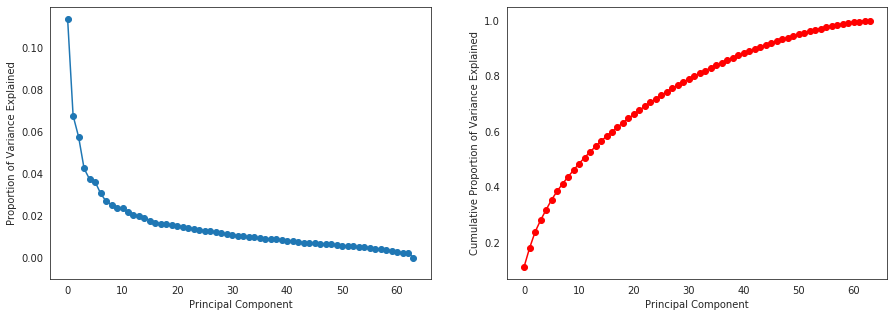

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left plot
ax1.plot(pca_2.explained_variance_ratio_, '-o')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca_2.explained_variance_ratio_), '-ro')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05);

### Clustering

In [38]:
X = pd.DataFrame(scale(nci_df), index=nci_label.type)

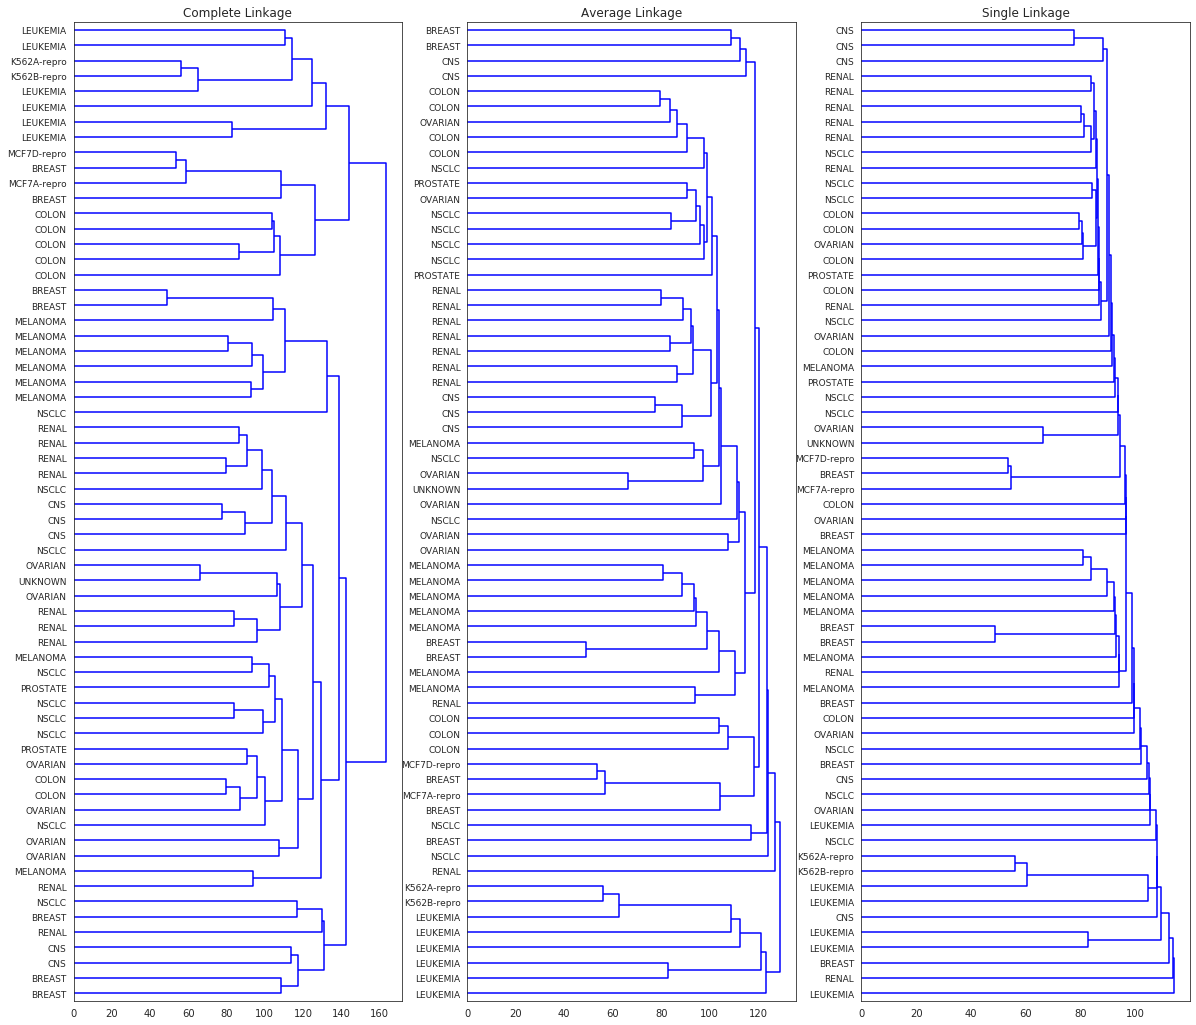

In [39]:
# Plotting the dendrogram
fig, axes = plt.subplots(1, 3, figsize=(20, 18))
for method, ax in zip(['complete', 'average', 'single'], axes):
  dendrogram = sch.dendrogram(sch.linkage(X, method=method),
                              labels=X.index,
                              ax=ax,
                              color_threshold=0,
                              orientation='right',
                              leaf_font_size=9)
  ax.set_title(method.title() + ' Linkage')

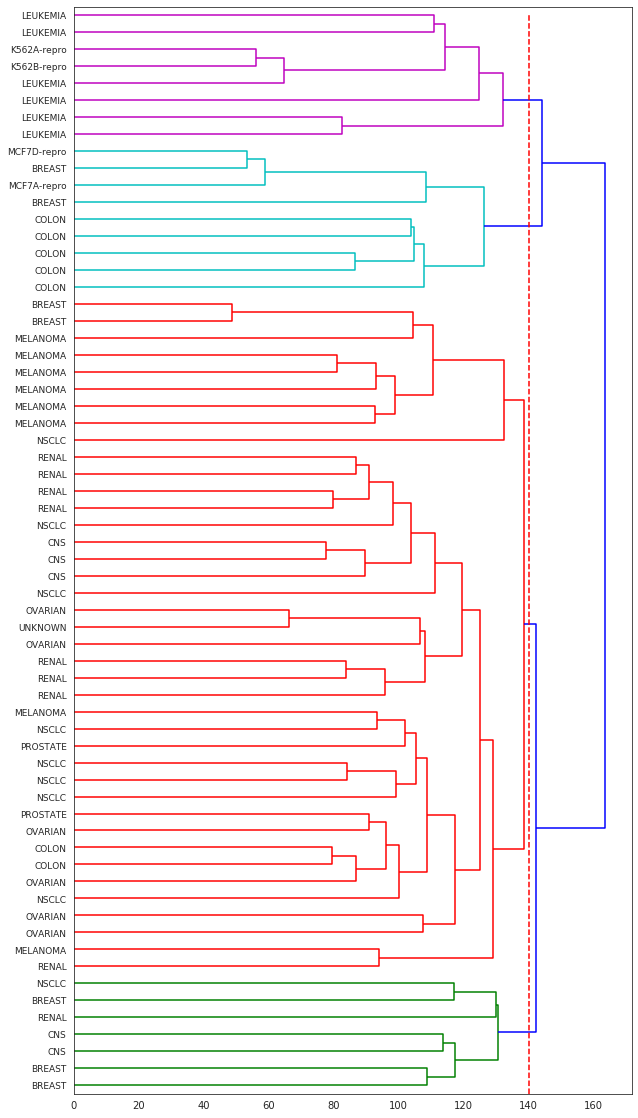

In [40]:
plt.figure(figsize=(10, 20))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'),
                            labels=X.index,
                            color_threshold=140,
                            orientation='right',
                            leaf_font_size=9)
plt.vlines(140, 0, plt.gca().yaxis.get_data_interval()[1], color='r', linestyles='dashed');

#### K-Means clustering

In [41]:
np.random.seed(2)
kmeans_3 = KMeans(n_clusters=4, n_init=20)
kmeans_3.fit(X)
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

#### Hierarchical clustering

In [42]:
hc_2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
y_hc = hc_2.fit_predict(X)
y_hc

array([0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])